In [1]:
import tensorflow as tf

In [2]:
# wave 곡선을 예측해 보자.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

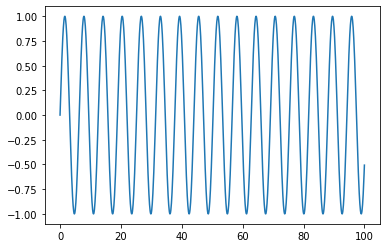

In [3]:
x = np.linspace(0, 100, 1001)
x = np.round(x,1) # 소수점 첫째 기준으로 반올림 추후에 학습시 문제 발생
y = np.sin(x)
plt.plot(x,y)

In [8]:
df = pd.DataFrame(data = y, index = x, columns = ['sin_wave'])

In [9]:
# Train, Test 분리
train = df.iloc[:801]
test = df.iloc[801:]

In [10]:
train.tail()

,sin_wave
79.6,-0.872445
79.7,-0.916876
79.8,-0.952146
79.9,-0.977903
80.0,-0.993889


In [11]:
test.head()

,sin_wave
80.1,-0.999944
80.2,-0.996008
80.3,-0.982120
80.4,-0.958419
80.5,-0.925142


In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
arr_1 = np.array([1,2,3,4,5])
generator = TimeseriesGenerator(arr_1, arr_1, length =2, batch_size =1)
generator[0], generator[1], generator[2]

((array([[1, 2]]), array([3])),
 (array([[2, 3]]), array([4])),
 (array([[3, 4]]), array([5])))

In [14]:
arr_1.shape

(5,)

In [15]:
train.shape

(801, 1)

In [17]:
length = 50
train_1 = np.array(train).reshape(801,)
generator = TimeseriesGenerator(train_1, train_1, length = length, batch_size = 1)
# train data를 이용해서 target data가 train인 data를 생성한다.

In [18]:
generator[0][0].shape

(1, 50)

In [19]:
generator[0][0]

array([[ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
         0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
         0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
         0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
         0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
         0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
         0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
        -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
        -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
        -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261]])

In [20]:
generator[1][0]

array([[ 0.09983342,  0.19866933,  0.29552021,  0.38941834,  0.47942554,
         0.56464247,  0.64421769,  0.71735609,  0.78332691,  0.84147098,
         0.89120736,  0.93203909,  0.96355819,  0.98544973,  0.99749499,
         0.9995736 ,  0.99166481,  0.97384763,  0.94630009,  0.90929743,
         0.86320937,  0.8084964 ,  0.74570521,  0.67546318,  0.59847214,
         0.51550137,  0.42737988,  0.33498815,  0.23924933,  0.14112001,
         0.04158066, -0.05837414, -0.15774569, -0.2555411 , -0.35078323,
        -0.44252044, -0.52983614, -0.61185789, -0.68776616, -0.7568025 ,
        -0.81827711, -0.87157577, -0.91616594, -0.95160207, -0.97753012,
        -0.993691  , -0.99992326, -0.99616461, -0.98245261, -0.95892427]])

In [25]:
# https://www.tensorflow.org/guide/keras/rnn?hl=ko
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, activation="tanh", input_shape=(50,1))) # tanh 는 기본값
model.add(tf.keras.layers.Dense(1))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss = "mse")

In [28]:
model.fit(generator, epochs=5)

Epoch 1/5
751/751 [==============================] - 29s 34ms/step - loss: 0.0028
Epoch 2/5
751/751 [==============================] - 22s 30ms/step - loss: 1.0797e-04
Epoch 3/5
751/751 [==============================] - 24s 32ms/step - loss: 2.4945e-04
Epoch 4/5
751/751 [==============================] - 22s 30ms/step - loss: 1.9290e-05
Epoch 5/5
751/751 [==============================] - 22s 30ms/step - loss: 3.3998e-04


In [29]:
# predict
length = 50
test_1 = np.array(test).reshape(200,)
generator_test = TimeseriesGenerator(test_1, test_1, length = length, batch_size = 1)

In [30]:
# test 80.1 ~ 100. 80.1~85 85.1~90 90.1~95 95.1~100

In [31]:
test_1

array([-0.99994369, -0.99600761, -0.98211976, -0.95841889, -0.92514181,
       -0.88262103, -0.83128139, -0.77163586, -0.70428039, -0.62988799,
       -0.54920196, -0.46302849, -0.37222858, -0.27770949, -0.18041562,
       -0.0813191 ,  0.01858994,  0.11831323,  0.21685437,  0.31322878,
        0.40647351,  0.49565689,  0.57988783,  0.65832473,  0.73018386,
        0.79474723,  0.85136976,  0.89948568,  0.93861423,  0.96836446,
        0.98843911,  0.99863761,  0.99885805,  0.98909823,  0.96945567,
        0.94012663,  0.90140415,  0.85367514,  0.79741649,  0.73319032,
        0.66163835,  0.58347552,  0.49948278,  0.41049938,  0.31741441,
        0.22115794,  0.12269172,  0.02299962, -0.07692229, -0.17607562,
       -0.27346966, -0.36813128, -0.45911465, -0.54551071, -0.6264562 ,
       -0.70114234, -0.76882291, -0.82882165, -0.88053907, -0.92345845,
       -0.95715093, -0.98127987, -0.99560419, -0.99998077, -0.99436586,
       -0.97881558, -0.9534853 , -0.91862811, -0.87459229, -0.82

In [35]:
generator_test[0], generator_test[-51],

((array([[-0.99994369, -0.99600761, -0.98211976, -0.95841889, -0.92514181,
          -0.88262103, -0.83128139, -0.77163586, -0.70428039, -0.62988799,
          -0.54920196, -0.46302849, -0.37222858, -0.27770949, -0.18041562,
          -0.0813191 ,  0.01858994,  0.11831323,  0.21685437,  0.31322878,
           0.40647351,  0.49565689,  0.57988783,  0.65832473,  0.73018386,
           0.79474723,  0.85136976,  0.89948568,  0.93861423,  0.96836446,
           0.98843911,  0.99863761,  0.99885805,  0.98909823,  0.96945567,
           0.94012663,  0.90140415,  0.85367514,  0.79741649,  0.73319032,
           0.66163835,  0.58347552,  0.49948278,  0.41049938,  0.31741441,
           0.22115794,  0.12269172,  0.02299962, -0.07692229, -0.17607562]]),
  array([-0.27346966])),
 (array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
           0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
           0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.8356813

In [37]:
predict_test = model.predict(generator_test)

150/150 [==============================] - 1s 5ms/step


In [38]:
predict_test.shape # 51 ~ 200까지 하나씩 예측해서 추가로 더해지니 150개임.

(150, 1)

In [39]:
test_2 = test.drop(test.index[0:length]) # 0~50은 따로 예측(0~50 ->51) 되는 값이 아니기에 지워줌.

In [40]:
test_2["predict_test_simplernn"] = predict_test

In [41]:
test_2

,sin_wave,predict_test_simplernn
85.1,-0.273470,-0.273424
85.2,-0.368131,-0.367270
85.3,-0.459115,-0.457414
85.4,-0.545511,-0.543074
85.5,-0.626456,-0.623485
...,...,...
99.6,-0.802196,-0.796767
99.7,-0.738582,-0.733909
99.8,-0.667588,-0.663631
99.9,-0.589924,-0.586507


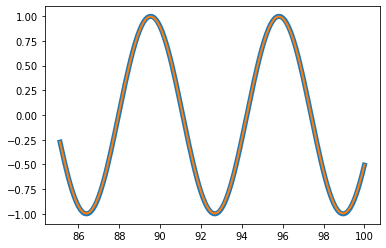

In [42]:
plt.plot(test_2.index, test_2.sin_wave, linewidth = 5.0) # True
plt.plot(test_2.index, test_2.predict_test_simplernn, linewidth = 2.0) # predict

In [43]:
length

50

In [44]:
generator_test[-51]

(array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
          0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
          0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.83568138,
          0.77667649,  0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,
          0.37960774,  0.28535064,  0.18824242,  0.08925333, -0.01062754,
         -0.11040222, -0.20907381, -0.30565639, -0.39918496, -0.48872501,
         -0.57338187, -0.6523097 , -0.72471986, -0.78988886, -0.84716555,
         -0.89597764, -0.93583742, -0.96634662, -0.98720041, -0.99819042,
         -0.99920683, -0.99023951, -0.97137803, -0.94281087, -0.90482346,
         -0.85779535, -0.80219643, -0.73858223, -0.66758835, -0.58992416]]),
 array([-0.50636564]))

In [45]:
generator_test[-51][0]

array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
         0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
         0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.83568138,
         0.77667649,  0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,
         0.37960774,  0.28535064,  0.18824242,  0.08925333, -0.01062754,
        -0.11040222, -0.20907381, -0.30565639, -0.39918496, -0.48872501,
        -0.57338187, -0.6523097 , -0.72471986, -0.78988886, -0.84716555,
        -0.89597764, -0.93583742, -0.96634662, -0.98720041, -0.99819042,
        -0.99920683, -0.99023951, -0.97137803, -0.94281087, -0.90482346,
        -0.85779535, -0.80219643, -0.73858223, -0.66758835, -0.58992416]])

In [52]:
model.predict(generator_test[-51][0])[0]

1/1 [==============================] - 0s 31ms/step


array([-0.5032281], dtype=float32)

In [57]:
generator_test[-51][0][:,1:]

array([[ 0.75274397,  0.81470506,  0.86852589,  0.91366869,  0.94968242,
         0.97620723,  0.99297811,  0.99982747,  0.99668689,  0.98358775,
         0.96066092,  0.92813548,  0.88633642,  0.83568138,  0.77667649,
         0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,  0.37960774,
         0.28535064,  0.18824242,  0.08925333, -0.01062754, -0.11040222,
        -0.20907381, -0.30565639, -0.39918496, -0.48872501, -0.57338187,
        -0.6523097 , -0.72471986, -0.78988886, -0.84716555, -0.89597764,
        -0.93583742, -0.96634662, -0.98720041, -0.99819042, -0.99920683,
        -0.99023951, -0.97137803, -0.94281087, -0.90482346, -0.85779535,
        -0.80219643, -0.73858223, -0.66758835, -0.58992416]])

In [54]:
np.append(generator_test[-51][0][:,1:], model.predict(generator_test[-51][0]))

1/1 [==============================] - 0s 20ms/step


array([ 0.75274397,  0.81470506,  0.86852589,  0.91366869,  0.94968242,
        0.97620723,  0.99297811,  0.99982747,  0.99668689,  0.98358775,
        0.96066092,  0.92813548,  0.88633642,  0.83568138,  0.77667649,
        0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,  0.37960774,
        0.28535064,  0.18824242,  0.08925333, -0.01062754, -0.11040222,
       -0.20907381, -0.30565639, -0.39918496, -0.48872501, -0.57338187,
       -0.6523097 , -0.72471986, -0.78988886, -0.84716555, -0.89597764,
       -0.93583742, -0.96634662, -0.98720041, -0.99819042, -0.99920683,
       -0.99023951, -0.97137803, -0.94281087, -0.90482346, -0.85779535,
       -0.80219643, -0.73858223, -0.66758835, -0.58992416, -0.50322813])

In [55]:
generator_test[-51][0].shape

(1, 50)

In [86]:
current_batch[:,1:]

array([[-0.41365018, -0.31719729, -0.21897987, -0.11514323, -0.01193332,
         0.09447235,  0.1979861 ,  0.30159286,  0.3998411 ,  0.49565202,
         0.58327812,  0.66596031,  0.73893642,  0.80585647,  0.86171019,
         0.91073787,  0.94763279,  0.97773427,  0.9949221 ,  1.00564682,
         1.00265491,  0.99327707,  0.97020322,  0.9411515 ,  0.89904642,
         0.85190135,  0.79254431,  0.72958541,  0.65540248,  0.57927406,
         0.49301729,  0.40680444,  0.31158376,  0.21869904,  0.11794738,
         0.02237642, -0.08000092, -0.17403147, -0.27384385, -0.36193493,
        -0.45493728, -0.53319472, -0.6158824 , -0.68141961, -0.75125474,
        -0.80192739, -0.85703081, -0.89140546, -0.93032229]])

In [84]:
current_predict = model.predict(current_batch)[0]
current_predict

1/1 [==============================] - 0s 34ms/step


array([-0.9465669], dtype=float32)

In [85]:
forecast = [] # 예측한 값만 넣어두는 list
current_batch = generator_test[-51][0] # 초기 예측하기 위해 사용하는 원래의 데이터
                          
for i in range(50):
  current_predict = model.predict(current_batch)[0]
  forecast.append(current_predict) # 예측한 값들만 저장
  current_batch = np.append(current_batch[:,1:], [current_predict], axis=1)
  # current_batch = np.append(current_batch[:,1:], current_predict).reshape(1,50)

1/1 [==============================] - 0s 17ms/step


In [87]:
forecast

[array([-0.5032281], dtype=float32),
 array([-0.41365018], dtype=float32),
 array([-0.3171973], dtype=float32),
 array([-0.21897987], dtype=float32),
 array([-0.11514323], dtype=float32),
 array([-0.01193332], dtype=float32),
 array([0.09447235], dtype=float32),
 array([0.1979861], dtype=float32),
 array([0.30159286], dtype=float32),
 array([0.3998411], dtype=float32),
 array([0.49565202], dtype=float32),
 array([0.5832781], dtype=float32),
 array([0.6659603], dtype=float32),
 array([0.7389364], dtype=float32),
 array([0.80585647], dtype=float32),
 array([0.8617102], dtype=float32),
 array([0.9107379], dtype=float32),
 array([0.9476328], dtype=float32),
 array([0.97773427], dtype=float32),
 array([0.9949221], dtype=float32),
 array([1.0056468], dtype=float32),
 array([1.0026549], dtype=float32),
 array([0.9932771], dtype=float32),
 array([0.9702032], dtype=float32),
 array([0.9411515], dtype=float32),
 array([0.8990464], dtype=float32),
 array([0.85190135], dtype=float32),
 array([0.79

In [88]:
forecast_index = np.arange(100,104.9, step = 0.1)

In [89]:
len(forecast_index),len(forecast)

(50, 50)

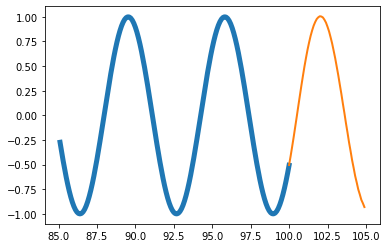

In [91]:
plt.plot(test_2.index, test_2.sin_wave, linewidth = 5.0) # True
plt.plot(forecast_index, forecast, linewidth = 2.0)# predict

In [68]:
#LSTM

In [69]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(50, activation="tanh", input_shape=(50,1)))
model_lstm.add(tf.keras.layers.Dense(1))

In [ ]:
model_lstm.compile(optimizer="adam", loss = "mse")
model_lstm.fit(generator, epochs=5)

Epoch 1/5
751/751 [==============================] - 8s 4ms/step - loss: 0.0169
Epoch 2/5
751/751 [==============================] - 3s 4ms/step - loss: 5.9264e-04
Epoch 3/5
751/751 [==============================] - 4s 6ms/step - loss: 6.7681e-05
Epoch 4/5
751/751 [==============================] - 3s 4ms/step - loss: 0.0011
Epoch 5/5
751/751 [==============================] - 3s 4ms/step - loss: 1.2238e-05


In [ ]:
forecast = [] # 예측한 값만 넣어두는 list
current_batch = generator_test[-51][0] # 초기 예측하기위해 사용(100을 예측) + 원래 만들어진 데이터 (예측x)
for i in range(200):
  currend_predict = model.predict(current_batch)[0]
  forecast.append(currend_predict) # 예측한 값들만 저장
  current_batch = np.append(current_batch[:,1:], currend_predict).reshape(1,50)


1/1 [==============================] - 0s 17ms/step


In [ ]:

plt.plot(test_2.index, test_2.sin_wave, linewidth = 5.0) # True
plt.plot(forecast_index, forecast, linewidth = 2.0)# predict